In [206]:
#项目11-项目实训代码
#第一步：数据导入
import pandas as pd
names=['area','perimeter','compactness','length of kernel','width of kernel','asymmetry coefficient','length of kernel groove','class']
dataset=pd.read_csv('seeds_dataset.txt',names=names,sep="\s+")
print('小麦种子数据集')
print(dataset)


小麦种子数据集
      area  perimeter  compactness  length of kernel  width of kernel  \
0    15.26      14.84       0.8710             5.763            3.312   
1    14.88      14.57       0.8811             5.554            3.333   
2    14.29      14.09       0.9050             5.291            3.337   
3    13.84      13.94       0.8955             5.324            3.379   
4    16.14      14.99       0.9034             5.658            3.562   
..     ...        ...          ...               ...              ...   
205  12.19      13.20       0.8783             5.137            2.981   
206  11.23      12.88       0.8511             5.140            2.795   
207  13.20      13.66       0.8883             5.236            3.232   
208  11.84      13.21       0.8521             5.175            2.836   
209  12.30      13.34       0.8684             5.243            2.974   

     asymmetry coefficient  length of kernel groove  class  
0                    2.221                    5.220   

In [207]:
#第二步：数据分析（查看数据分组）
print(dataset.groupby('class').size())

class
1    70
2    70
3    70
dtype: int64


In [208]:
#第二步：数据分析（数据统计）
print(dataset.describe())

             area   perimeter  compactness  length of kernel  width of kernel  \
count  210.000000  210.000000   210.000000        210.000000       210.000000   
mean    14.847524   14.559286     0.870999          5.628533         3.258605   
std      2.909699    1.305959     0.023629          0.443063         0.377714   
min     10.590000   12.410000     0.808100          4.899000         2.630000   
25%     12.270000   13.450000     0.856900          5.262250         2.944000   
50%     14.355000   14.320000     0.873450          5.523500         3.237000   
75%     17.305000   15.715000     0.887775          5.979750         3.561750   
max     21.180000   17.250000     0.918300          6.675000         4.033000   

       asymmetry coefficient  length of kernel groove       class  
count             210.000000               210.000000  210.000000  
mean                3.700201                 5.408071    2.000000  
std                 1.503557                 0.491480    0.818448 

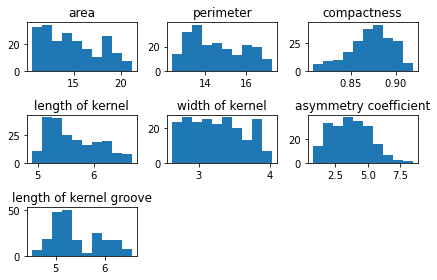

In [209]:
#第三步：数据可视化（直方图）
import matplotlib.pyplot as plt

#分别提取数据集中的特征变量和标签值
data=dataset.iloc[range(0,210),range(0,7)].values  #提取训练数据
target=dataset.iloc[range(0,210),range(7,8)].values.reshape(1,210)[0]#提取标签值
names=['area','perimeter','compactness','length of kernel','width of kernel','asymmetry coefficient','length of kernel groove']

#绘制直方图
plt.figure() #创建绘图对象
for i,name in enumerate(names):
    plt.subplot(3,3,i+1)
    plt.hist(data[:,i])  #绘制直方图
    plt.title(name)
plt.tight_layout() #调整图形布局
plt.show()


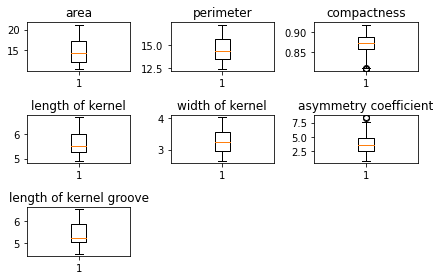

In [210]:
#第三步：数据可视化（单变量图--箱线图）
plt.figure() #创建绘图对象
for i,name in enumerate(names):
    plt.subplot(3,3,i+1)
    plt.boxplot(data[:,i])#绘制箱形图
    plt.title(name)
plt.tight_layout() #调整图形布局
plt.show()

In [211]:
#第四步：算法评估
#导入算法模块
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  #导入逻辑回归算法模块
from sklearn.neighbors import KNeighborsClassifier   #导入k近邻分类算法模块
from sklearn.naive_bayes import GaussianNB           #导入高斯朴素贝叶斯算法模块
from sklearn.tree import DecisionTreeClassifier      #导入决策树分类算法模块
from sklearn.svm import SVC                          #导入支持向量机分类模块
from sklearn.ensemble import RandomForestClassifier  #导入随机森林分类算法模块
from sklearn.neural_network import MLPClassifier     #导入神经网络算法模块
#拆分数据集
x,y=data,target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#搭建模型
models=[]
LRmodel=LogisticRegression(solver='liblinear')                 #搭建逻辑回归模型
kNNmodel=KNeighborsClassifier()                                #搭建k近邻模型
GNBmodel=GaussianNB()                                          #搭建高斯朴素贝叶斯模型
DTreemodel=DecisionTreeClassifier(random_state=1)              #搭建决策树分类模型
SVMmodel=SVC(gamma='auto',random_state=1)                      #搭建支持向量机分类模型
RFmodel=RandomForestClassifier(n_estimators=10,random_state=1) #搭建随机森林分类模型
MLPmodel=MLPClassifier(hidden_layer_sizes=(10,10),random_state=1,max_iter=2000) #搭建神经网络模型
#将各个模型加入models中
models.append(('LRmodel',LRmodel))
models.append(('kNNmodel',kNNmodel))
models.append(('GNBmodel',GNBmodel))
models.append(('DTreemodel',DTreemodel))
models.append(('SVMmodel',SVMmodel))
models.append(('RFmodel',RFmodel))
models.append(('MLPmodel',MLPmodel))

In [212]:
#第四步：算法评估
#使用交叉验证法约束模型的训练过程，并估计每个模型的预测准确率
from sklearn.model_selection import cross_val_score  #导入交叉验证模块
from sklearn.model_selection import KFold

for name,model in models:
    kfold=KFold(n_splits=5,random_state=100,shuffle=True)#10折交叉验证
    cv_scores=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    print('%s的预测准确率为：%f'%(name,cv_scores.mean()))

LRmodel的预测准确率为：0.917469
kNNmodel的预测准确率为：0.869697
GNBmodel的预测准确率为：0.893226
DTreemodel的预测准确率为：0.863280
SVMmodel的预测准确率为：0.893583
RFmodel的预测准确率为：0.899109
MLPmodel的预测准确率为：0.940820


In [214]:
#第五步：训练与评估模型（神经网络模型）
from sklearn.metrics import classification_report
MLPmodel=MLPClassifier(hidden_layer_sizes=(10,10),random_state=1,max_iter=2000) 
MLPmodel.fit(x_train,y_train)
#对模型进行评估，并输出评估报告
pred=MLPmodel.predict(x_test)
re=classification_report(y_test,pred)
print('神经网络模型评估报告：')
print(re)

神经网络模型评估报告：
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        18

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

